<a href="https://colab.research.google.com/github/dimLMT/Prediction-of-Product-Sales/blob/main/part2_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Mengtian Liu


## Project Overview
- sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

- Use Pandas to read the sales prediction data set into Google Colab.
  
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
#load file
import numpy as np
import pandas as pd

fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
print('\n\n')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data
- Explore the data - what do you need to do to clean this data? Clean it!
- Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

In [2]:
df.shape

(8523, 12)

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


In [6]:
cat_cols = df.select_dtypes('object').columns
for cols in cat_cols:
  print(df[cols].value_counts(),'\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Mediu

In [7]:
consis_dict = {'LF':'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(consis_dict)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

6) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Start using machine learning to make predictions about future sales based on the data provided.

First, ensure there is no data leakage!

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.

In [9]:
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
# other imports
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Perform a train test split
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


Create a preprocessing object to prepare the dataset for Machine Learning.

Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [10]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
num_cols = X_train.select_dtypes("number").columns

# instantiate preprocessors
num_impute_na = SimpleImputer(strategy='median')
num_scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(num_impute_na, num_scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [11]:
# list of all categorical columns
cat_cols = X_train.select_dtypes("object").columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
ord_cols = ['Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
ord_impute_na = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our Ordinal Columms
OS_order = ['NA','Small','Medium','High']
# Making the list of order lists for OrdinalEncoder
ordinal_orders = [OS_order]
ord_encoder = OrdinalEncoder(categories=ordinal_orders)
# Making a final scaler to scale ordinal data
ord_scaler= StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(ord_impute_na, ord_encoder, ord_scaler)
ord_pipe

Ordinal Columns: ['Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())])

In [13]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
nom_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("Nominal Columns:", nom_cols)
# Instantiate the individual preprocessors
nom_impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
nom_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
nom_pipe = make_pipeline(nom_impute_na, nom_encoder)
nom_pipe


Nominal Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [14]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
print(num_tuple)
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
print(ord_tuple)
# Making a nominal_tuple for ColumnTransformer
nom_tuple = ('nominal', nom_pipe, nom_cols)
print(nom_tuple)

('numeric', Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())]), Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))
('ordinal', Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())]), ['Outlet_Size'])
('nominal', Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))


In [15]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, nom_tuple],
                                    verbose_feature_names_out=False)
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [16]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Build a linear regression model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).
- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# the custom evaluation function to get the metrics for your model
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [18]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(col_transformer, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [19]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)
# Obtain Model Evulation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.120
- MSE = 1,297,558.548
- RMSE = 1,139.104
- R^2 = 0.562
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.048
- MSE = 1,194,230.406
- RMSE = 1,092.808
- R^2 = 0.567


$\color{blue}{this\ model\ is\ underfit\ due\ to\ low\ R^2\ values }$

Select the top 3 most impactful features and interpret their coefficients

In [20]:
# Redefine the onehotencoder-add argument drop = 'first'
nom_encoder = OneHotEncoder(sparse_output=False, drop = 'first')
nom_pipe = make_pipeline(nom_impute_na, nom_encoder)
# Making a nominal_tuple for ColumnTransformer
nom_tuple = ('nominal', nom_pipe, nom_cols)
# Instantiate with verbose_feature_names_out=False
new_col_transformer = ColumnTransformer([num_tuple, ord_tuple, nom_tuple],
                                    verbose_feature_names_out=False)
linreg_pipe = make_pipeline(new_col_transformer, linreg)
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                 ('nominal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [21]:
# Otain preprocessed feature names
# Saving the coefficients
coeffs = pd.Series(linreg_pipe[-1].coef_, index= linreg_pipe[0].get_feature_names_out())
coeffs['intercept'] = linreg_pipe[-1].intercept_
coeffs

Item_Weight                       -7.870034e+00
Item_Visibility                   -2.149954e+01
Item_MRP                           9.845972e+02
Outlet_Establishment_Year          1.504767e+15
Outlet_Size                        1.000858e+15
Item_Fat_Content_Regular           6.196579e+01
Item_Type_Breads                  -2.977803e+01
Item_Type_Breakfast                4.672337e+01
Item_Type_Canned                   2.727550e+01
Item_Type_Dairy                   -1.068423e+02
Item_Type_Frozen Foods            -1.633199e+00
Item_Type_Fruits and Vegetables    4.567083e+01
Item_Type_Hard Drinks              1.355862e+01
Item_Type_Health and Hygiene       2.687242e+01
Item_Type_Household                5.969650e+00
Item_Type_Meat                    -1.168198e+01
Item_Type_Others                  -2.667030e+01
Item_Type_Seafood                  3.282236e+02
Item_Type_Snack Foods             -2.183747e+01
Item_Type_Soft Drinks             -3.966649e+01
Item_Type_Starchy Foods            4.209

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

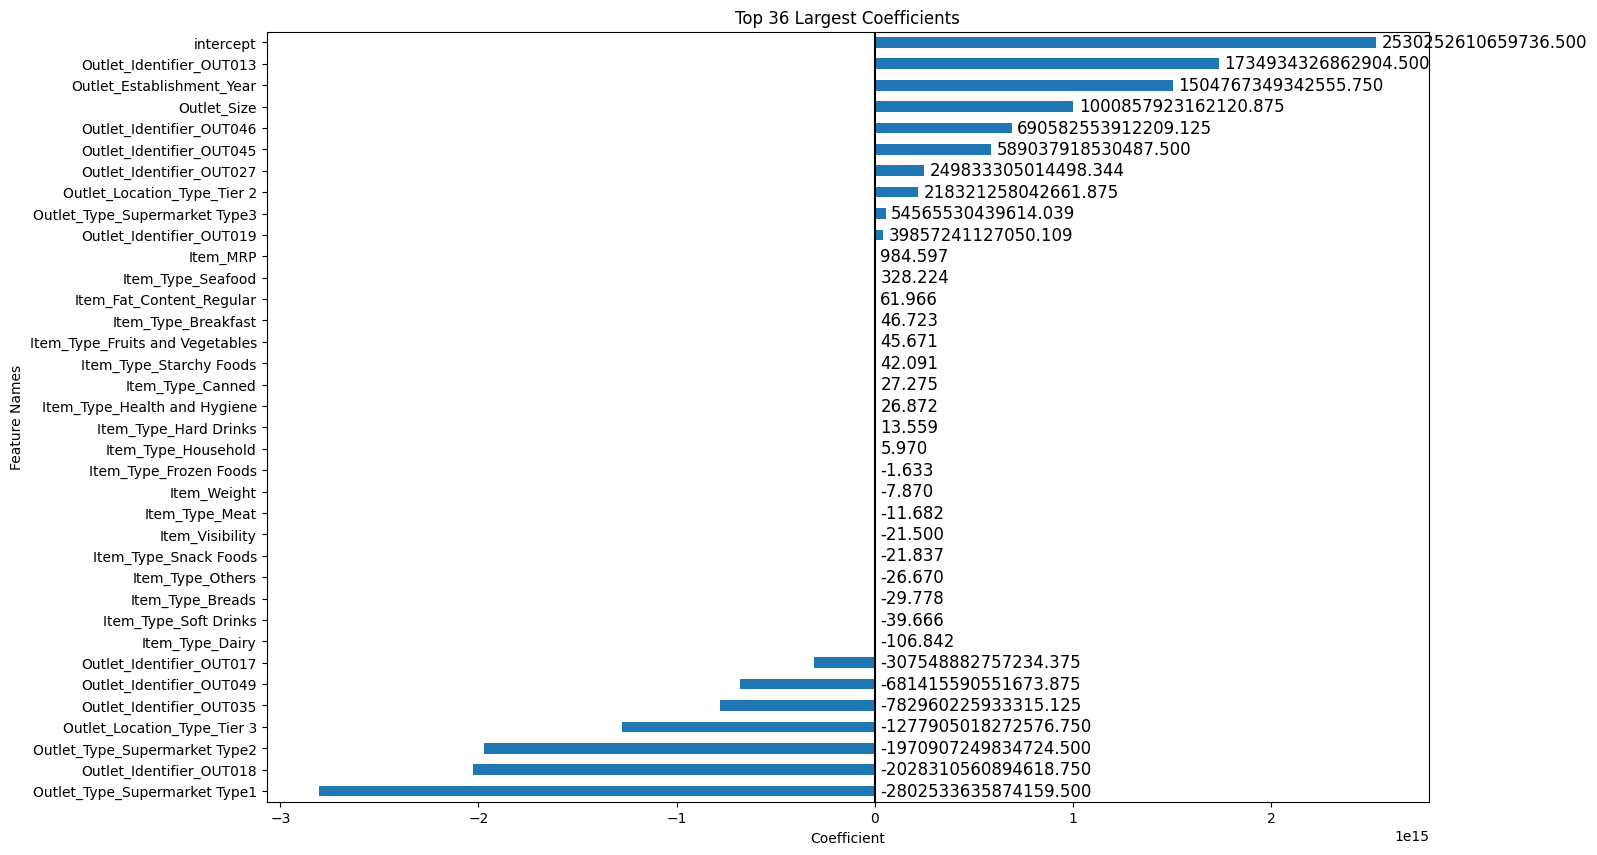

In [23]:
## Testing our function with intercept=True
plot_coeffs(coeffs, top_n=len(coeffs), intercept=True, annotate=True, figsize=(15,10));

It appears that these coefficients do not meet our sanity check criteria, as they exhibit significant disparities in magnitude. This suggests that linear regression may not be a suitable model for this particular problem.
### Build a KNN model with bagged trees

In [50]:
bagreg = BaggingRegressor(KNeighborsRegressor(7), n_estimators=14, random_state=42)
# Combine the preprocessing ColumnTransformer and the KNN model in a Pipeline
bagreg_pipe = make_pipeline(col_transformer, bagreg)
bagreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('baggingregressor',
                 BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=7),
                                  n_estimators=14, random_state=42))])

In [51]:
# Fit the model pipeline and Obtain Model Evulation
# Fit the model pipeline on the training data only
bagreg_pipe.fit(X_train, y_train)
evaluate_regression(bagreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 724.940
- MSE = 1,025,231.908
- RMSE = 1,012.537
- R^2 = 0.654
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 799.902
- MSE = 1,280,774.684
- RMSE = 1,131.713
- R^2 = 0.536


In [53]:
# Define param grid with options to try
params = {'baggingregressor__estimator__n_neighbors':[3,4,5,6,7,8],
          'baggingregressor__estimator__weights':['uniform','distance'],
          'baggingregressor__n_estimators': [10,14,18,22]}

In [54]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(bagreg_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'baggingregressor__estimator__n_neighbors': 8,
 'baggingregressor__estimator__weights': 'uniform',
 'baggingregressor__n_estimators': 22}

In [55]:
## Evaluate the best model
best_model = gridsearch.best_estimator_
evaluate_regression(best_model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 733.047
- MSE = 1,046,106.561
- RMSE = 1,022.794
- R^2 = 0.647
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 793.993
- MSE = 1,262,783.248
- RMSE = 1,123.736
- R^2 = 0.542


$\color{blue}{this\ model\ is\ worse\ than\ the\ linear\ regression\ when\ training.}$
### Build a default Random Forest model.
- Use the custom evaluation function to get the metrics for your model (on training and test data).
- Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- Compare this model's performance to the linear regression model: which model has the best test scores?

In [18]:
# Instantiate default random forest model
rfreg = RandomForestRegressor(random_state = 42)
rfreg.fit(X_train_processed, y_train)
evaluate_regression(rfreg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.120
- MSE = 182,642.045
- RMSE = 427.366
- R^2 = 0.938
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.081
- MSE = 1,216,212.220
- RMSE = 1,102.820
- R^2 = 0.559


$\color{blue}{this\ model\ is\ overfit\ due\ to\ the\ high\ R^2\ value\ for\ training\ data\ only\ }$
- the linear regression model is slightly better here, with the R^2 of 0.567
###  Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.

After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).

Compare your tuned model to your default Random Forest: did the performance improve?

In [19]:
# Define param grid with options to try
params = {'n_estimators':[80,100,120],
          'max_features':['sqrt',None],
          'max_depth': [None,4,5,6,7,10],
          'min_samples_leaf':[1,2]}

In [20]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rfreg, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train_processed, y_train)
gridsearch.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 1,
 'n_estimators': 80}

In [21]:
## Evaluate the best model
best_model = gridsearch.best_estimator_
evaluate_regression(best_model, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 741.923
- MSE = 1,111,235.727
- RMSE = 1,054.152
- R^2 = 0.625
------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 727.806
- MSE = 1,101,261.527
- RMSE = 1,049.410
- R^2 = 0.601


Surprisingly, the performance did not improve!

- You need to determine which model to implement. Overall, which model do you recommend?

```Random Forest Regressor```

- Justify your recommendation. Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.

```0.601 is still slighlty larger than the other two model```

- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder. Include why you selected this metric to explain to your stakeholder.

```RMSE, a larger RMSE means more error/deviation from the true data. The prediction is that Item_Outlet_Sales will be within the range of Item_Outlet_Sales - RMSE to Item_Outlet_Sales + RMSE, so a smaller RMSE gives better prediction.```

- Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

```The tuned random forest model remains underfit, as ~0.6 is not a ideal R^2 value. It is reccomened that additional models be explored.```

Extract and visualize the feature importances that your best model determined.
Identify the top 5 most important features.

In [62]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(best_model, X_test_processed, y_test, n_repeats =8, random_state =42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [64]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_processed.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances


Item_MRP                           7.222162e-01
Outlet_Type_Grocery Store          4.199924e-01
Outlet_Identifier_OUT027           3.286418e-02
Outlet_Type_Supermarket Type3      1.492612e-02
Outlet_Establishment_Year          8.159682e-03
Item_Visibility                    1.542230e-03
Outlet_Type_Supermarket Type1      7.463701e-04
Outlet_Type_Supermarket Type2      5.556424e-04
Item_Weight                        5.206376e-04
Outlet_Identifier_OUT018           2.563354e-04
Item_Type_Canned                   2.188971e-04
Item_Type_Fruits and Vegetables    1.998177e-04
Outlet_Identifier_OUT017           1.957636e-04
Item_Type_Soft Drinks              9.005754e-05
Outlet_Identifier_OUT045           8.324680e-05
Item_Type_Seafood                  7.351984e-05
Outlet_Identifier_OUT046           4.137228e-05
Outlet_Location_Type_Tier 3        3.351140e-05
Item_Type_Starchy Foods            2.946185e-05
Item_Type_Household                2.931576e-05
Outlet_Size                        1.801

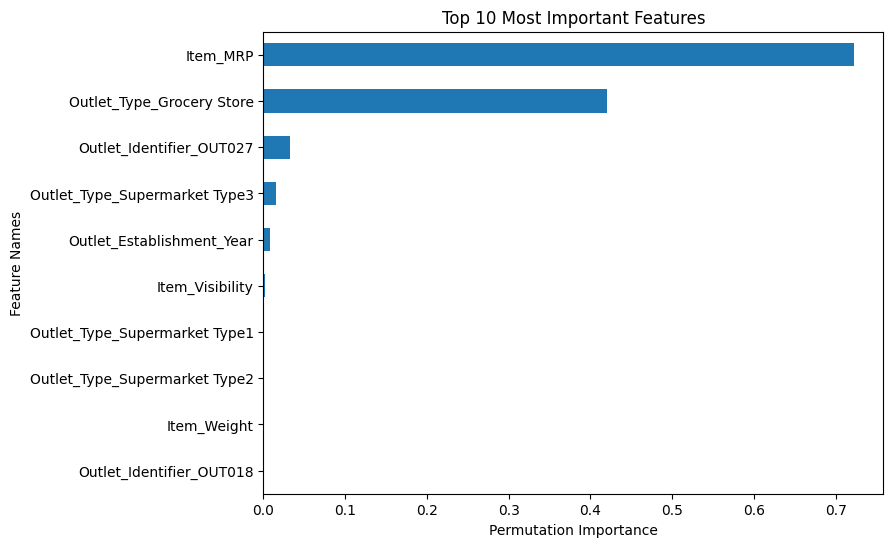

In [65]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

## Global and Local Explanations

In [22]:
# Import shap and initialize javascript:
#!pip install shap
import shap
# Create explainer
explainer = shap.Explainer(best_model)
explainer

In [73]:
# Getting the shap values
shap_values = explainer(X_train_processed,y_train)
shap_values.shape

(6392, 40)

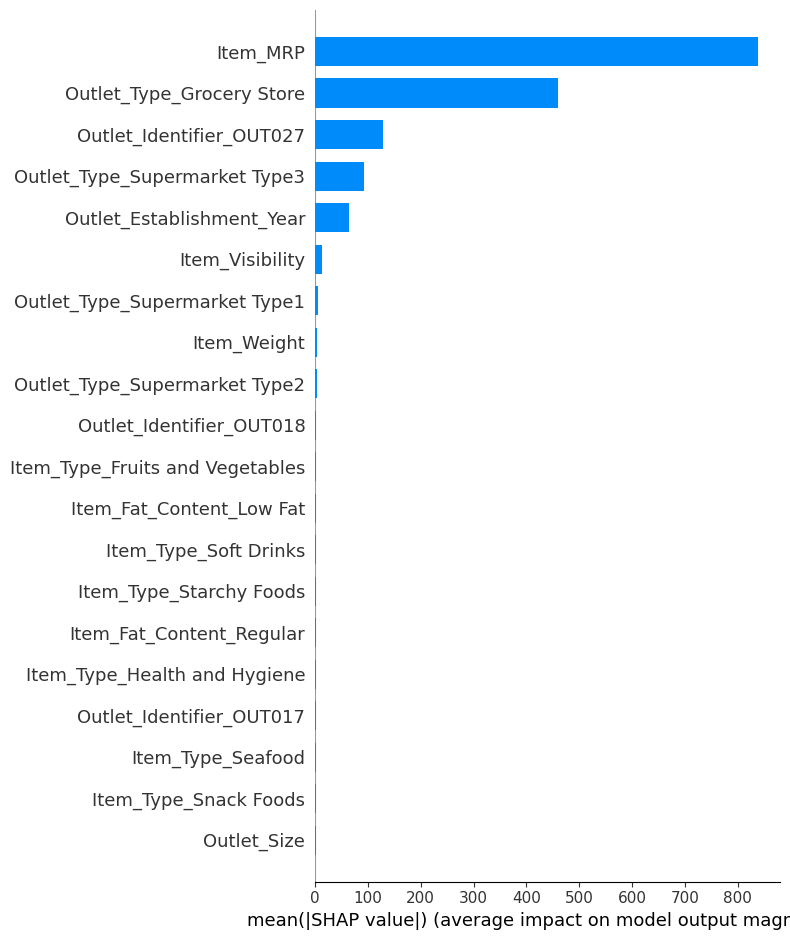

In [74]:
# Create a shap summary bar plot
shap.summary_plot(shap_values,features= X_train_processed, plot_type='bar')

- Here, the permutation importances and SHAP importances shared similar important features. Let's remove the plot_type='bar' argument and examine the default visualization indicating which direction the features push the prediction (Each dot represents an observation/row).

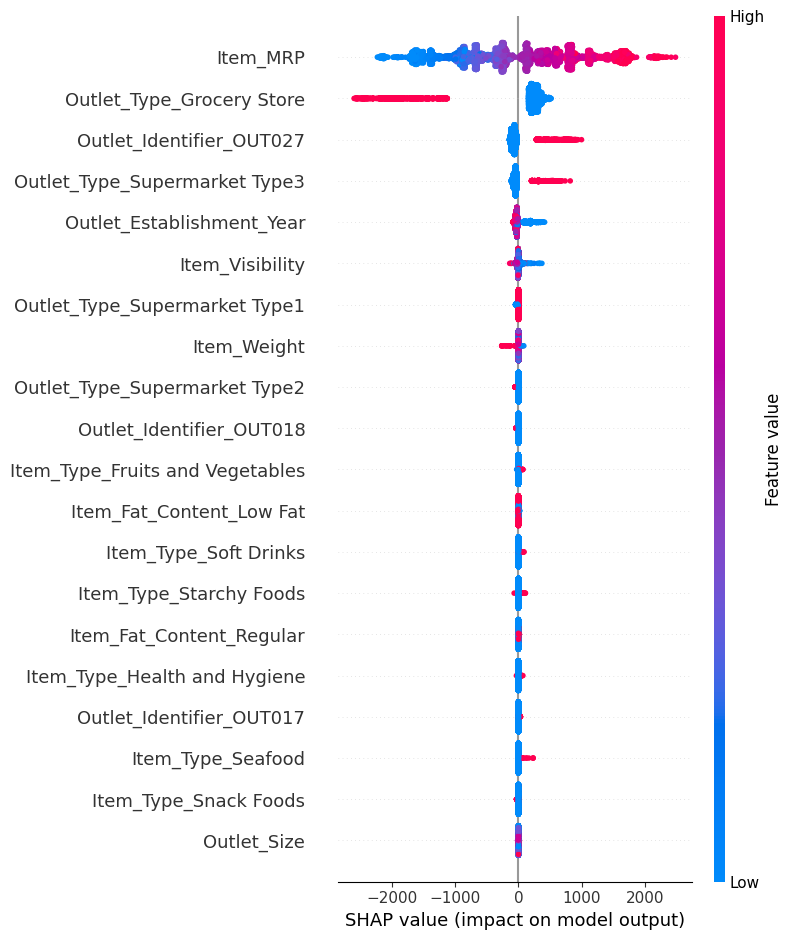

In [75]:
# Create a shap summary dot plot
shap.summary_plot(shap_values,features= X_train_processed)

In [23]:
# Take a sample of X
X_shap = shap.sample(X_train_processed, nsamples=300, random_state=42)
# get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
shap_values = explainer(X_shap,y_shap)
# Global Forceplot
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values.values,features= X_shap)

In [30]:

# !pip install lime
# Unlike SHAP, the LimeTablulaerExplainer does not require the model itself
from lime.lime_tabular import LimeTabularExplainer
# create the lime explainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap.values,
    feature_names=X_shap.columns,
    mode='regression')

In [33]:
#choose one example
i=23
exp = lime_explainer.explain_instance(X_shap.iloc[i], best_model.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
